# Hotel Booking Data


---
**Objective:**

In this notebook, we are going to create some visualizations to better explore our dataset and clean it as a next step.

## Dataset Explanation
- **hotelHotel:** (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0)
- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year:** Year of arrival date
- **arrival_date_month:** Month of arrival date
- **arrival_date_week_number:** Week number of year for arrival date
- **arrival_date_day_of_month:** Day of arrival date
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults:** Number of adults
- **children:** Number of children
- **babies:** Number of babies
- **meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_gues:t** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations:**  Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes:**  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces:** Number of car parking spaces required by the customer
- **total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

After you download the **hotel_bookings.csv** dataset file, upload it to your runtime so you can work with it.

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
print(df)

# 1. Exploring your data / Diagnosis phase

## 1.1 Question 1: Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the last few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [35]:
df.shape

(119390, 32)

In [ ]:
df.columns

- Missing values in agent, children, country and company columns (We can see that from the non null count)

## 1.2 Exploratory data analysis

[link text](https://)### Question 2: Check for missing Values

 Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [38]:
df.isna().sum().sum()
   # Count of missing values in each column

129425

### Question 3: Explore descriptive statistics

In [ ]:
 # Summary statistics for numerical columns
df.describe()

### Question 4: Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

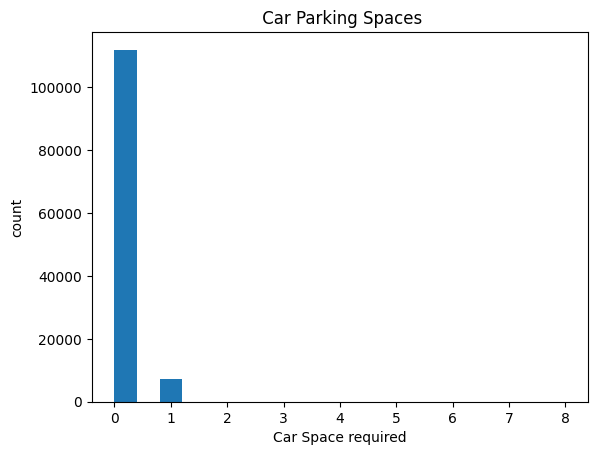

In [40]:
import matplotlib.pyplot as plt

# Histogram for "required_car_parking_spaces" column
plt.hist (df['required_car_parking_spaces'],bins=20)
plt.title(' Car Parking Spaces')
plt.xlabel("Car Space required")
plt.ylabel("count")
plt.show

Text(0, 0.5, 'count')

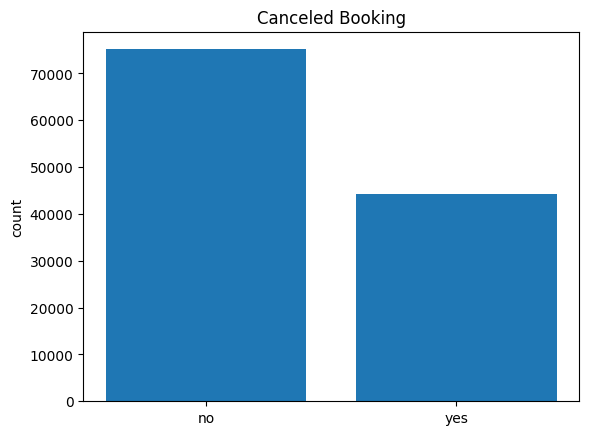

In [41]:
# Bar plot for "is_canceled" column
plt.bar(['no','yes'],df['is_canceled'].value_counts())
plt.title('Canceled Booking')
plt.ylabel('count')

## 1.3 Cleaning

### Question 5: Handling Missing Values

In [42]:
# Create a copy of the DataFrame
df_copy = df.copy()

In [ ]:
# Option 1: Remove rows with missing values
df_copy_dropped = df_copy.dropna()
# Option 2: Impute missing values
# Fill missing values with a specific value
df_copy_filled = df_copy.fillna(0)
# Fill missing values with the mean value of the column
df_copy_mean = df_copy.fillna(df_copy.mean())
# Option 3: Drop columns with excessive missing data
# Set a threshold for the percentage of missing values in a column
threshold = 0.5  # Example threshold of 50%
df_copy_dropped_cols = df_copy.dropna(thresh=threshold*len(df_copy), axis=1)
# Print the modified DataFrames
print("DataFrame with dropped rows:\n", df_copy_dropped)
print("DataFrame with filled missing values:\n", df_copy_filled)
print("DataFrame with filled missing values using mean:\n", df_copy_mean)

### Data Types

Check Unique Values for df column to know whether column type is correct or not

In [ ]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

According to the unqiue values per each column the following columns should be change to
1. **categorical columns:**   mealType, country,market_segment,distribution_channel,reserved_room_type, assigned_room_type, customer_type,reservation_status,arrival_date_month, hotel, arrival_date_year
2. **boolean:** is_canceled, is_repeated_guest
3. **int:** children, agent, company, ...
4. **date:** reservation_status_date

After knowing which columns represent categorical data, let's see the counts of each value in these columns

In [ ]:
df_cat=df[['hotel','is_canceled','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']]
for i in df_cat.columns:
    x = df_cat[i].value_counts()
    print("Column name is:",i,"and its value counts are:")
    print(x)
    print()

The *category data type* in Python will continue to look like a string character to us and in many places will behave like a string (or object) type; however, it is internally being represented by integer values, unique to each category.

Question 6: Here's how we change to the category dtype

In [48]:
df_cat = df_cat.astype("category")

Below, we confirm that the dtype has changed to category:

In [ ]:
df_cat.info()

## 1.4 Question 7: Feature Correlation

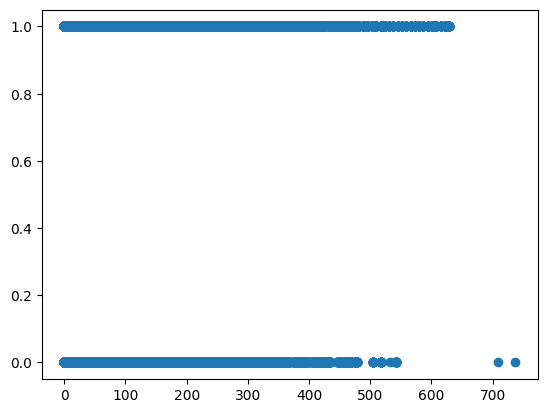

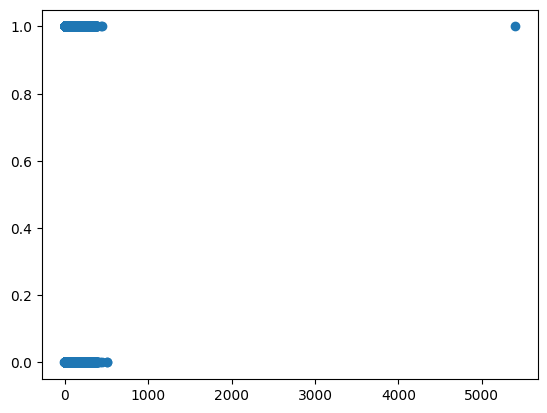

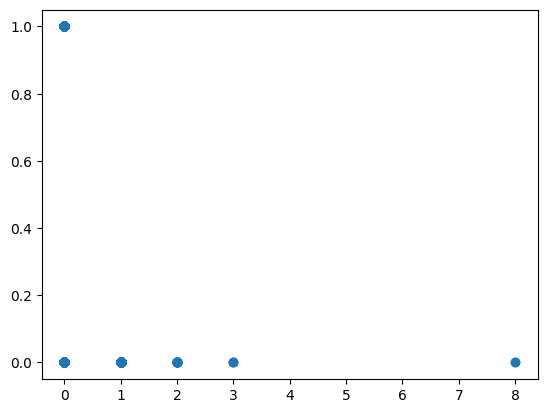

In [50]:
import matplotlib.pyplot as plt
# Select the columns of interest
columns_of_interest = ['lead_time', 'adr', 'required_car_parking_spaces']
# Scatter plots
for i in columns_of_interest:
  plt.scatter(df[i], df['is_canceled'])
  plt.show()

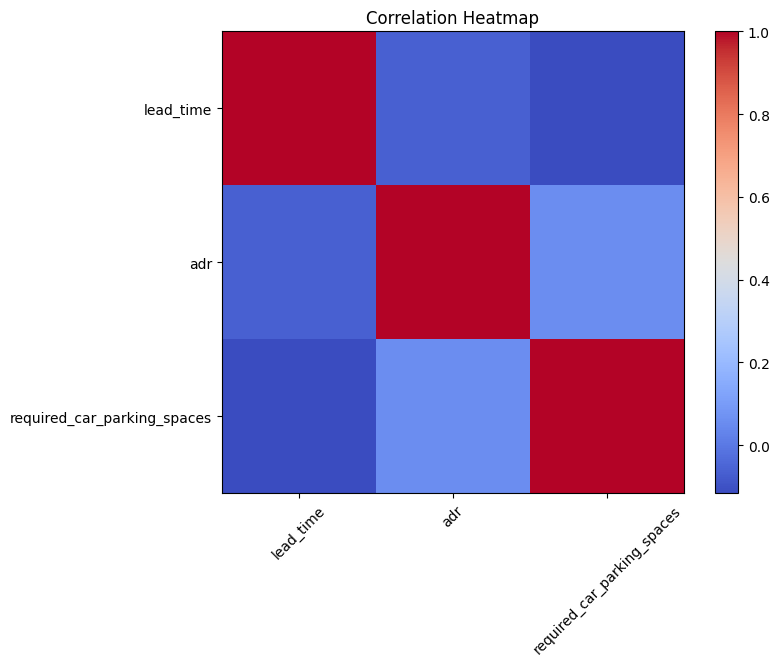

In [51]:
# Correlation heatmap
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(columns_of_interest))
plt.xticks(tick_marks, columns_of_interest, rotation=45)
plt.yticks(tick_marks, columns_of_interest)
plt.title('Correlation Heatmap')
plt.show()